# Gun Violence 2013 thru March 2018
Gun violence seems to be on the rise.  It is a rare month that goes buy that you do not hear about some form of gun violence.  There is surprisingly not a central location of this data that has such an effect on communities across the United States.

This notebook will chronicle exploring one of the datasets that is publicly available.  It will look at how many deaths are in the United States of America and if there are any areas that demonstrate higher probablity of gun violence taking place.  Looking at the date the occurrences happen we will also evaluate if there is a season or day of the week for gun violence to happen.

The data we are looking at is from kaggle at https://www.kaggle.com/jameslko/gun-violence-data.  It is pulled from http://gunviolencearchive.org, a group that pulls this data from about 7500 sources.  It is just one of several organizations that is looking to have a centeralized location for near real time data.

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [39]:
# Importing data and parsing date from the date column.
df = pd.read_csv('gun-violence-data_01-2013_03-2018.csv', parse_dates = ['date'])

## Exploratory Data Analysis

In [40]:
df.head()

incident_id       date           state city_or_county  \
0       461105 2013-01-01    Pennsylvania     Mckeesport   
1       460726 2013-01-01      California      Hawthorne   
2       478855 2013-01-01            Ohio         Lorain   
3       478925 2013-01-05        Colorado         Aurora   
4       478959 2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/478855   
3  http://www.gunviolencearchive.org/incident/478925   
4  http://www.gunviolencearchive.org/incident/478959   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.dailybulletin.com/article/zz/201301...   
2  http://chronicle.northcoastnow.com/2013/02/14/...   
3  http://www.dailydemocrat.com/20130106/aurora-s...   
4  http://www.journalnow.com/news/local/article_d...   

   incident_url_fields_missing  ...                    participant_age  \
0                        False  ...                              0::20   
1                        False  ...                              0::20   
2                        False  ...  0::25||1::31||2::33||3::34||4::33   
3                        False  ...         0::29||1::33||2::56||3::33   
4                        False  ...         0::18||1::46||2::14||3::47   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                            participant_gender  \
0         0::Male||1::Male||3::Male||4::Female   
1                                      0::Male   
2  0::Male||1::Male||2::Male||3::Male||4::Male   
3         0::Female||1::Male||2::Male||3::Male   
4       0::Female||1::Male||2::Male||3::Female   

                                    participant_name  \
0                                     0::Julian Sims   
1                                  0::Bernard Gillis   
2  0::Damien Bell||1::Desmen Noble||2::Herman Sea...   
3  0::Stacie Philbrook||1::Christopher Ratliffe||...   
4  0::Danielle Imani Jameison||1::Maurice Eugene ...   

   participant_relationship  \
0                       NaN   
1                       NaN   
2                       NaN   
3                       NaN   
4                 3::Family   

                                  participant_status  \
0  0::Arrested||1::Injured||2::Injured||3::Injure...   
1      0::Killed||1::Injured||2::Injured||3::Injured   
2  0::Injured, Unharmed, Arrested||1::Unharmed, A...   
3         0::Killed||1::Killed||2::Killed||3::Killed   
4       0::Injured||1::Injured||2::Killed||3::Killed   

                                    participant_type  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
2  0::Subject-Suspect||1::Subject-Suspect||2::Vic...   
3  0::Victim||1::Victim||2::Victim||3::Subject-Su...   
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...   

                                             sources state_house_district  \
0  http://pittsburgh.cbslocal.com/2013/01/01/4-pe...                  NaN   
1  http://losangeles.cbslocal.com/2013/01/01/man-...                 62.0   
2  http://www.morningjournal.com/general-

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null datetime64[ns]
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude            

The data has features for the participants age and it stores all parties involved within each row.  The main feature that I am interested in if n_killed.  Going to see if there is a correlation to deaths from gun violence and location.  There are also features that indicate the state House and Senate districts.

There are a few of the features that are not going to be useful.  While these are usefull for analizing and viewing each incident individually, I am going to drop these out of the dataframe.

In [42]:
drop = ['incident_url', 'source_url', 'incident_url_fields_missing', 'notes', 'sources']
df = df.drop(columns=drop)

There is still a lot of missing data.  Most of it is just unknown or not applicable.  Setting missing data to unknown.

In [43]:
unknown = ['address', 'gun_stolen', 'gun_type', 'n_guns_involved', 'participant_age', 'participant_age_group',
          'participant_gender', 'participant_name', 'participant_status', 'participant_type']
df[unknown] = df[unknown].fillna('unknown')

A few of the features that have null I am going to set to N/A.

In [44]:
na = ['incident_characteristics', 'location_description']
df[na] = df[na].fillna('N/A')

And filling in the na for participant relationship to reflect no relationship.

In [45]:
df['participant_relationship'] = df['participant_relationship'].fillna('No Relationship')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 24 columns):
incident_id                 239677 non-null int64
date                        239677 non-null datetime64[ns]
state                       239677 non-null object
city_or_county              239677 non-null object
address                     239677 non-null object
n_killed                    239677 non-null int64
n_injured                   239677 non-null int64
congressional_district      227733 non-null float64
gun_stolen                  239677 non-null object
gun_type                    239677 non-null object
incident_characteristics    239677 non-null object
latitude                    231754 non-null float64
location_description        239677 non-null object
longitude                   231754 non-null float64
n_guns_involved             239677 non-null object
participant_age             239677 non-null object
participant_age_group       239677 non-null object
participant_ge

Filling the nulls of the congressional, house, and senate districts with the mode of the city or county that it is in.

In [47]:
missing_cong_dist = df['city_or_county'][df['congressional_district'].isna()].unique()

def missing_mode(what, where):
    missing = df[where][df[what].isna()].unique()
    for miss in missing:
        df[what].fillna(df.loc[df[where] == miss].mode()[what][0], inplace=True)
        
missing_mode('congressional_district', 'city_or_county')

In [48]:
missing_mode('state_house_district', 'city_or_county')

In [49]:
missing_mode('state_senate_district', 'city_or_county')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 24 columns):
incident_id                 239677 non-null int64
date                        239677 non-null datetime64[ns]
state                       239677 non-null object
city_or_county              239677 non-null object
address                     239677 non-null object
n_killed                    239677 non-null int64
n_injured                   239677 non-null int64
congressional_district      239677 non-null float64
gun_stolen                  239677 non-null object
gun_type                    239677 non-null object
incident_characteristics    239677 non-null object
latitude                    231754 non-null float64
location_description        239677 non-null object
longitude                   231754 non-null float64
n_guns_involved             239677 non-null object
participant_age             239677 non-null object
participant_age_group       239677 non-null object
participant_ge

Getting the missing latitude and longitude.

In [51]:
df['address_full'] = df['latitude'].where(~df['latitude'].isna(), other=(df['address'].map(str) + ', ' + df['city_or_county'].map(str) + ', ' + df['state']), axis=0)

In [52]:
add_nan = df['address_full'][df['latitude'].isna()]
add_nan = add_nan.to_frame('address')

In [53]:
add_nan

address
257                          unknown, Derry, Pennsylvania
277          104th Ave and Walnut St, Oakland, California
1926       3700 block of Coconino Dr., San Antonio, Texas
1933    2100 block of London Court, Henrico County, Vi...
2184                 Harmons Hill Rd, Millsboro, Delaware
...                                                   ...
239666  3100 block of California St, Saint Louis, Miss...
239668                            I-96, Detroit, Michigan
239669                       Hayes Rd, Madison, Wisconsin
239670         1 block of N Paulina St, Chicago, Illinois
239672  North Riceland Road and Highway 90, Rayne, Lou...

[7923 rows x 1 columns]

Building a cache so that locations are only queried once.  Using pickle to store and load the saved cache.

In [54]:
cache = {}

In [55]:
import pickle
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from opencage.geocoder import OpenCageGeocode
import requests
import re


try:
    cache = pickle.load(open('cache.p', 'rb'))
except (OSError, IOError) as e:
    cache ={}

In [56]:
def geocode(add):
    cache = addCached(add)

    if (cache != False): 
        # Returns the values already in cache
        return cache
    if (cache == False):
        print('Querying for address: {}'.format(add))
        location = loc_nominatim(add)
        if (location == None):
            location = loc_openCage(add)
            if (location == None):
                print('Next up locationIQ')
                location = loc_locationIq(add)
                if (location == None):
                    location = loc_google(add)
                    if (location == None):
                        return

        if (location != None):
            saveToCache(add, location)
            return location

def addCached(add):
    global cache
    if (add in cache):
        if (cache[add] != None):
            #print('Got from Cache')
            return cache[add]
        if (cache[add] == None):
            print('Cache was none.')
            return False
    return False

def saveToCache(add, location):
    global cache
    if (location != None):
        cache[add] = location
        pickle.dump(cache, open('cache.p', 'wb'))
        print('Added to cache.')
    else:
        print('Location is None')

def loc_nominatim(add):
    lat_lon = {}
    # Setup geopy for Nominatim and set rate limits
    geolocator = Nominatim(user_agent='Student testing')
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
    try:
        lat_lon = geolocator.geocode(add)
        if (lat_lon != None):
            print('Got from Nominatim')
            return lat_lon.raw
        else:
            return lat_lon
    except (KeyboardInterrupt, SystemExit):
        raise
    except:
        print('Nominatim failed with exception.')
        lat_lon = None
        return lat_lon
    
def loc_google(add):
    lat_lon = {}
    try:
        res = requests.get('https://www.google.com/maps/place/'+add)
        #print(res.text)
        #print(re.findall(r'(?:\/@)(-?\d+(\.\d+)),(-?\d+(\.\d+))', res.text))
        raw = re.findall(r'(?:\/@)(-?\d+(\.\d+)),(-?\d+(\.\d+))', res.text)[0]
        #print(raw)
        lat_lon['lat'], lat_lon['lon'] = raw[0], raw[2]
        if (lat_lon != None):
            print('Got from Google')
            return lat_lon
    except (KeyboardInterrupt, SystemExit):
        raise
    except:
        print('Google failed with exception.')
        lat_lon = None
        return lat_lon
        
def loc_openCage(add):
    lat_lon = {}
    # API key
    key = 'a1479ac1a65747dfa4b49a32d697861c'
    geocoder = OpenCageGeocode(key)
    try:
        location = geocoder.geocode(add)
        #print (location[0]['geometry']['lat'])
        lat_lon['lat'], lat_lon['lon'], lat_lon['extra'] = location[0]['geometry']['lat'], location[0]['geometry']['lng'], location
        if (lat_lon != None):
            print('Got from OpenCage')
            return lat_lon
    except (KeyboardInterrupt, SystemExit):
        raise
    except:
        print('OpenCage failed with exception.')
        lat_lon = None
        return lat_lon
    
def loc_locationIq(add):
    lat_lon = {}
    url = "https://us1.locationiq.com/v1/search.php"
    data = {
        'key': 'pk.92e024776968fa545bedc8929ae3f5d8',
        'q': add,
        'format': 'json'
    }
    try:
        response = requests.get(url, params=data)
        lat_lon = response.json()[0]
        if (lat_lon != None):
            print('Got from LocationIQ')
            return lat_lon
    except (KeyboardInterrupt, SystemExit):
        raise
    except:
        print('LocationIq failed with exception.')
        lat_lon = None
        return lat_lon

In [57]:
def get_loc(add):
    loc = geocode(add)
    if loc is None:
        return np.nan
    lat = loc['lat']
    lon = loc['lon']
    return pd.Series([lat, lon])

In [58]:
add_nan[['latitude', 'longitude']] = add_nan['address'].apply(get_loc)

Adding missing latitiude and longitude values into dataframe.

In [59]:
df.update(add_nan)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 30 columns):
incident_id                 239677 non-null int64
date                        239677 non-null datetime64[ns]
state                       239677 non-null object
city_or_county              239677 non-null object
address                     239677 non-null object
n_killed                    239677 non-null int64
n_injured                   239677 non-null int64
congressional_district      239677 non-null float64
gun_stolen                  239677 non-null object
gun_type                    239677 non-null object
incident_characteristics    239677 non-null object
latitude                    239677 non-null object
location_description        239677 non-null object
longitude                   239677 non-null object
n_guns_involved             239677 non-null object
participant_age             239677 non-null object
participant_age_group       239677 non-null object
participant_gend

In [32]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title='Gun Violence Profiling Report', html={'style':{'full_width':True}})
profile

## Feature Engineering

Lets extra a few extra date features and combine the total victims of each incident.

In [185]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['monthday'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekdayname'] = df['date'].dt.weekday_name
df['total'] = df['n_killed'] + df['n_injured']

## Data Visualization and Exploration

Number of incidents by year.

Text(0, 0.5, 'Number of Cases')

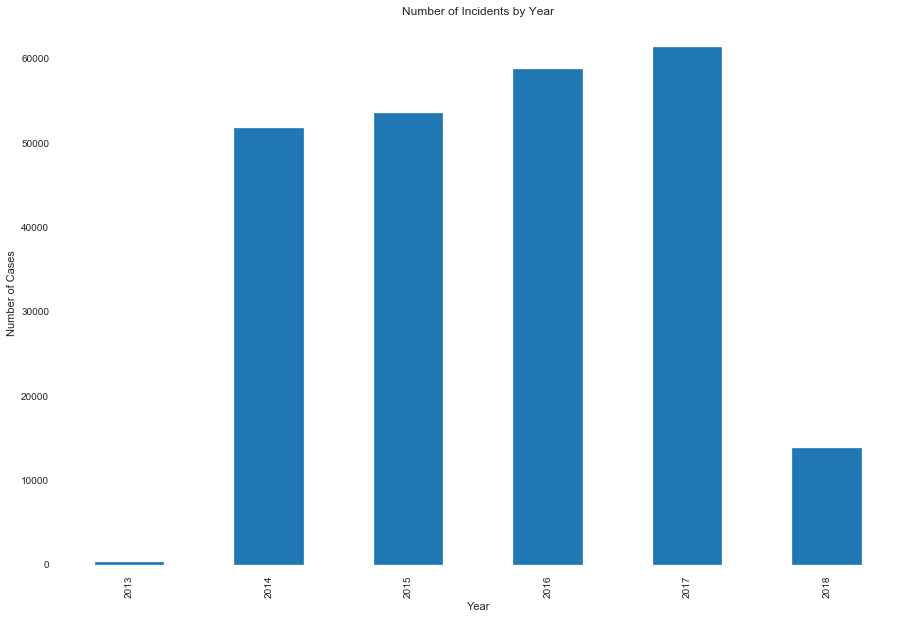

In [117]:
df['year'].value_counts().sort_index().plot(kind='bar', figsize = (15,10))
plt.title('Number of Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

Looks like years of 2013 and 2018 have a lot less then the rest of the years.  It is probably because there is just not as much data recorded during those years.

In [98]:
df.year.value_counts()

2017    61401
2016    58763
2015    53579
2014    51854
2018    13802
2013      278
Name: year, dtype: int64

In [109]:
#df['date'].where(df['year'] == 2013)
mask = (df['date'] > '2013-1-1') & (df['date'] <= '2013-12-31')
print(df['date'].loc[mask])

3     2013-01-05
4     2013-01-07
5     2013-01-07
6     2013-01-19
7     2013-01-21
         ...    
273   2013-12-29
274   2013-12-29
275   2013-12-31
276   2013-12-31
277   2013-12-31
Name: date, Length: 275, dtype: datetime64[ns]


In [110]:
# df['date'].where(df['year'] == 2018)
mask = (df['date'] > '2018-1-1') & (df['date'] <= '2018-12-31')
print(df['date'].loc[mask])

226117   2018-01-02
226118   2018-01-02
226119   2018-01-02
226120   2018-01-02
226121   2018-01-02
            ...    
239672   2018-03-31
239673   2018-03-31
239674   2018-03-31
239675   2018-03-31
239676   2018-03-31
Name: date, Length: 13560, dtype: datetime64[ns]


Here we can see that 2013 data spans the whole year, but there is much less incidents.  A quick search turns up an FBI quick look at shooting incidents in the United States.  Their analysis has it at 86 in 2013.  Where our data has inputed 278 incidents.

https://www.fbi.gov/about/partnerships/office-of-partner-engagement/active-shooter-incidents-graphics

2018 there we can see that the data only contains incidents up to March.

Total incidents by month.

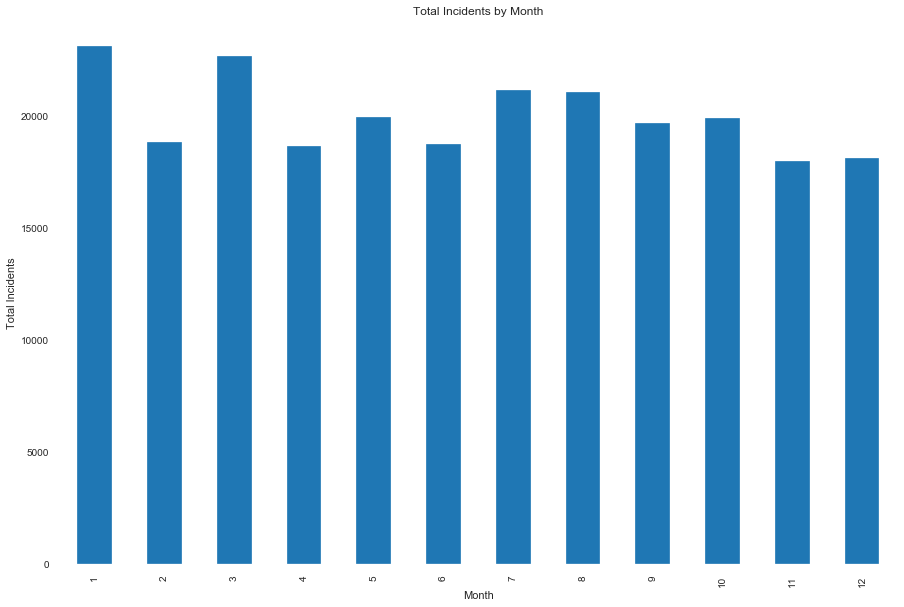

In [133]:
df.month.value_counts().sort_index().plot(kind='bar', figsize=(15,10))
plt.title('Total Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Total Incidents')
plt.show()

Nothing visually to indicate that the month has an effect on incidents.

Incidents broken down by state.

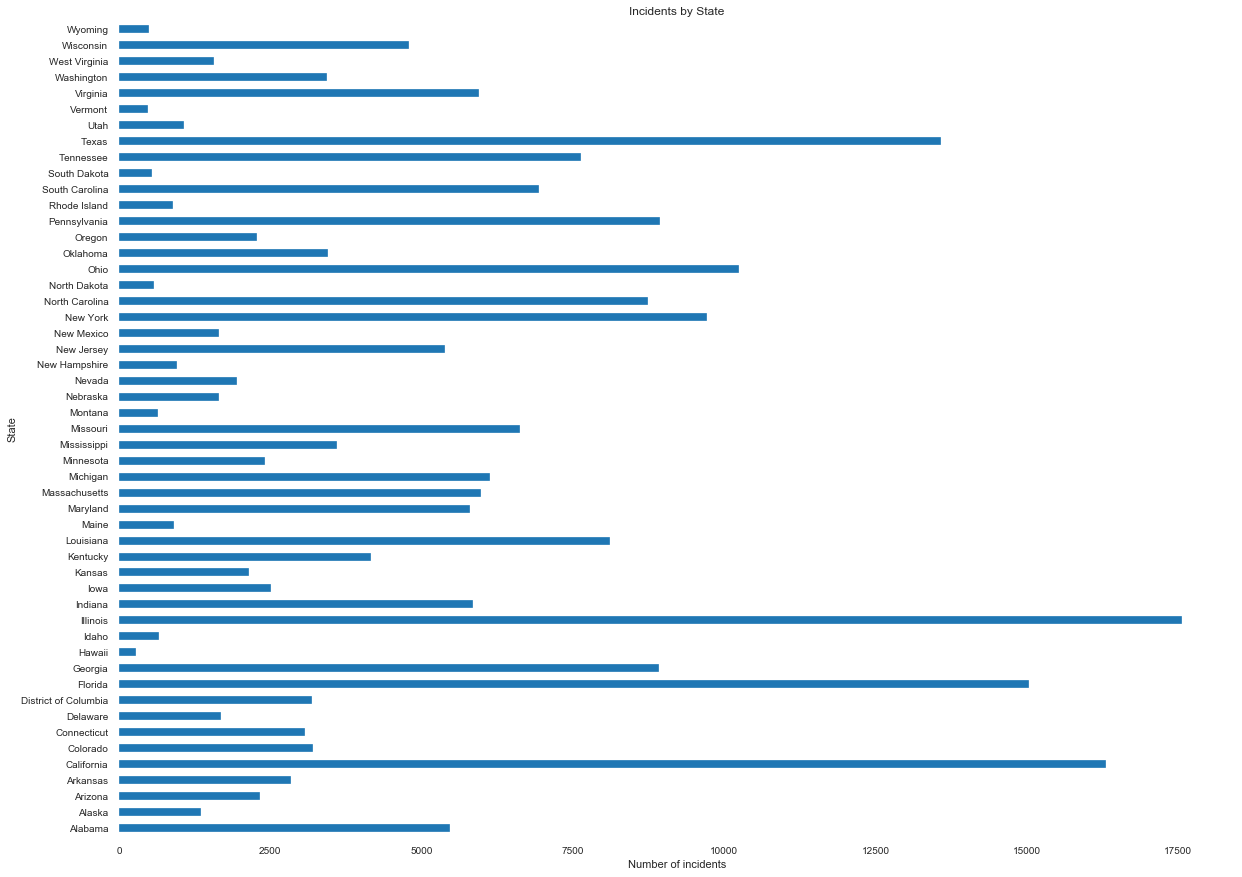

In [132]:
df.state.value_counts().sort_index().plot(kind='barh', figsize=(20,15))
plt.title('Incidents by State')
plt.xlabel('Number of incidents')
plt.ylabel('State')
plt.show()

There are a few states that have a lot more incidents then others.

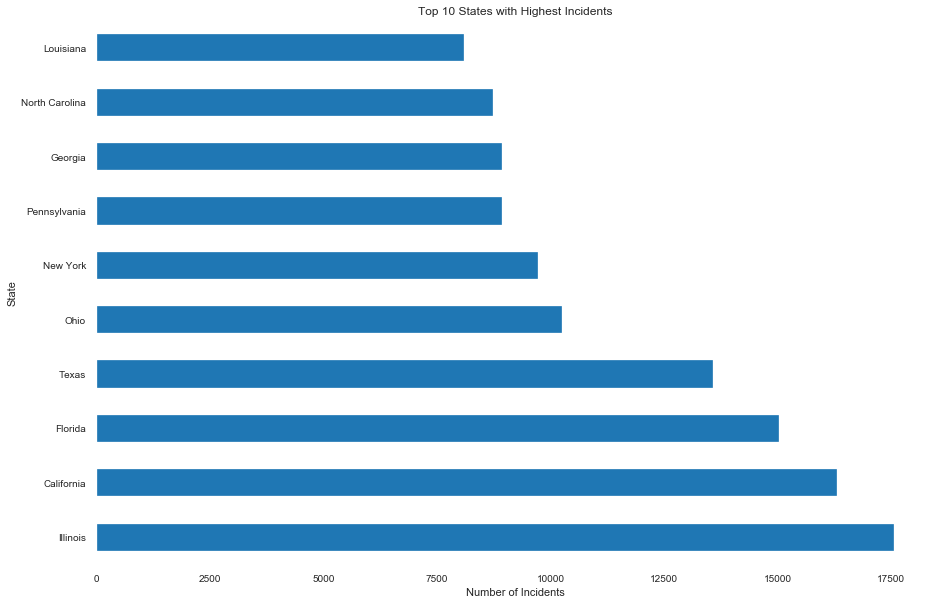

In [131]:
df.state.value_counts().head(10).plot(kind='barh', figsize=(15,10))
plt.title('Top 10 States with Highest Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('State')
plt.show()

There is a drop after the 4th top 10 states.  There is good indication that there is something going on the in the top 4 states that cause them to have a higher total incidents.

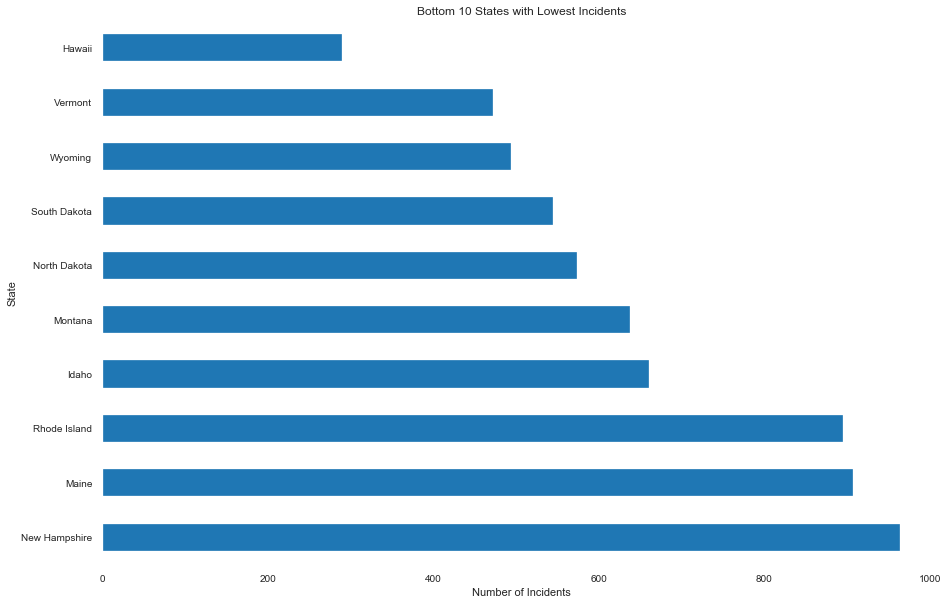

In [130]:
df.state.value_counts().tail(10).plot(kind='barh', figsize=(15,10))
plt.title('Bottom 10 States with Lowest Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('State')
plt.show()

There are some suprising states listed in the bottom 10 that you would not think to see here.  The increase in incidents as you move down the list is gradual but noticable after the 7th state from the bottom.

Here are the top 10 cities or counties with the most incidents.

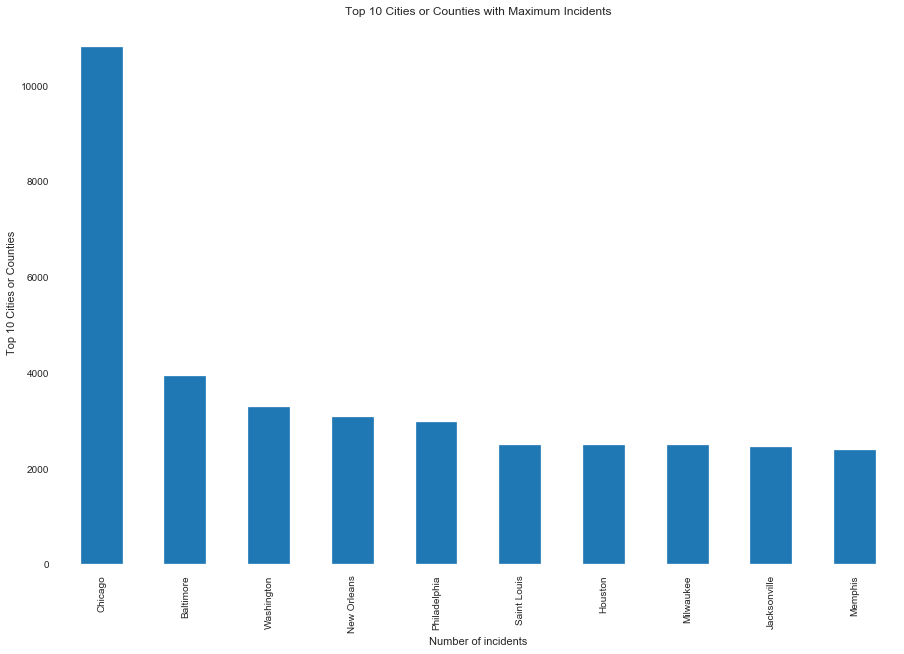

In [135]:
df.city_or_county.value_counts().head(10).plot(kind='bar', figsize=(15, 10))
plt.title('Top 10 Cities or Counties with Maximum Incidents')
plt.xlabel('Number of incidents')
plt.ylabel('Top 10 Cities or Counties')
plt.show()

We can see why Illinois is top of the list for incidents, the city of Chicago dominates the amount of incidents even in the top 10 highest.

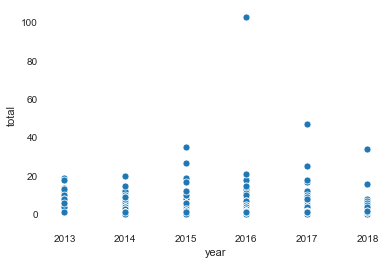

In [140]:
sns.scatterplot('year', 'total', data=df)

Looking at total victims by year you can see that some incidents have a high number of victims.  Since there is a year to year increase in the ammount of incidents we should expect to see the total amount of victims increase from year to year as well.

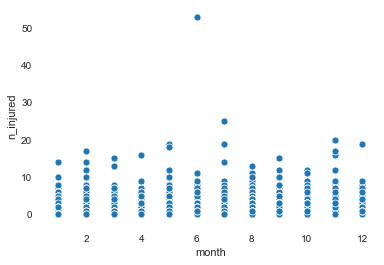

In [143]:
sns.scatterplot('month','n_injured', data=df)

This is also apparent in when breaking it down by months as well.  

In [149]:
df1 = df.sort_values(['total'], ascending=[False])
df1[['date', 'state', 'city_or_county', 'address', 'n_killed', 'n_injured']].head(10)

date       state            city_or_county  \
130448 2016-06-12     Florida                   Orlando   
217151 2017-11-05       Texas        Sutherland Springs   
101531 2015-12-02  California            San Bernardino   
232745 2018-02-14     Florida  Pompano Beach (Parkland)   
70511  2015-05-17       Texas                      Waco   
195845 2017-07-01    Arkansas               Little Rock   
137328 2016-07-25     Florida                Fort Myers   
11566  2014-04-02       Texas                 Fort Hood   
73     2013-05-12   Louisiana               New Orleans   
92624  2015-10-01      Oregon                  Roseburg   

                                             address  n_killed  n_injured  
130448                          1912 S Orange Avenue        50         53  
217151                                    216 4th St        27         20  
101531                    1365 South Waterman Avenue        16         19  
232745                           5901 Pine Island Rd        17         17  
70511                        4671 S Jack Kultgen Fwy         9         18  
195845                                  220 W 6th St         0         25  
137328                                3580 Evans Ave         2         19  
11566   Motor Pool Road and Tank Destroyer Boulevard         4         16  
73                                  Frenchmen Street         0         19  
92624                         1140 Umpqua College Rd        10          9

Sorting out the worste incidents, you can see these directly reflected in the scatterplots above.

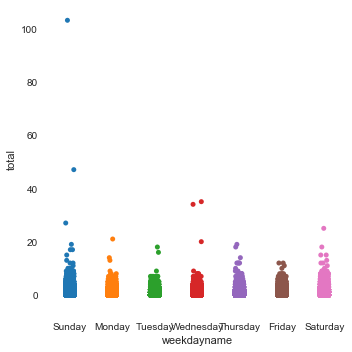

In [186]:
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sns.catplot('weekdayname','total', data=df, order=order)

In [187]:
df['total'].groupby(df['weekdayname']).sum().sort_values()

weekdayname
Thursday     22213
Tuesday      23085
Wednesday    23276
Friday       23628
Monday       24547
Saturday     30372
Sunday       31749
Name: total, dtype: int64

Looks like the amount of incedents do go up during the weekend.  Sunday being the day of the week that contains the highest amount of incidents.

## Predictive Model

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 31 columns):
incident_id                 239677 non-null int64
date                        239677 non-null datetime64[ns]
state                       239677 non-null object
city_or_county              239677 non-null object
address                     239677 non-null object
n_killed                    239677 non-null int64
n_injured                   239677 non-null int64
congressional_district      239677 non-null float64
gun_stolen                  239677 non-null object
gun_type                    239677 non-null object
incident_characteristics    239677 non-null object
latitude                    239677 non-null object
location_description        239677 non-null object
longitude                   239677 non-null object
n_guns_involved             239677 non-null object
participant_age             239677 non-null object
participant_age_group       239677 non-null object
participant_gend

In [213]:
# Y is the target variable
Y = pd.DataFrame(df['state'])
# X is the feature set
X = df[['n_killed', 'n_injured', 'city_or_county', 'date']]

X = sm.add_constant(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, x_train).fit()

results.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [205]:
# Y is the target variable
Y = pd.DataFrame(df['weekday'])
# X is the feature set
X = df['total']

X = sm.add_constant(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, x_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                weekday   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     810.2
Date:                Sun, 26 Apr 2020   Prob (F-statistic):          7.71e-178
Time:                        06:49:05   Log-Likelihood:            -4.0678e+05
No. Observations:              191741   AIC:                         8.136e+05
Df Residuals:                  191739   BIC:                         8.136e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9398      0.006    468.588      0.000       2.928       2.952
total          0.1622      0.006     28.464      0.000       0.151       0.173
==============================================================================
Omnibus:                   359312.834   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12814.841
Skew:                          -0.040   Prob(JB):                         0.00
Kurtosis:                       1.736   Cond. No.                         2.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### KNN Regression

In [211]:
n_neighbor = 5
knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbor)
# Y is the target variable
Y = pd.DataFrame(df['total'])
# X is the feature set
X = df[['n_killed', 'n_injured']]
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 10, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K={}, Unweighted'.format(n_neighbor))
plt.xlabel('Weekdays')
plt.ylabel('Total Incidents')

# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=n_neighbor, weights='distance')
knn_w.fit(X, Y)

Y_ = knn_w.predict(T)


plt.subplot(1, 2, 2)
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K={}, Weighted'.format(n_neighbor))
plt.xlabel('Weekdays')
plt.ylabel('Total Crashes')
plt.show()

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

ValueError: query data dimension must match training data dimension

In [202]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
X = pd.DataFrame(df['weekday'])
Y = df['total']
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)